# A/B TEST

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

STEP 1 
- The probability that an individual received the new page 
- The probability of an individual converting regardless of the page they receive 
- Given that an individual was in the control group, the probability they converted 
- Given that an individual was in the treatment group, the probability they converted 

STEP 2
- Based on the given probabilities, infer the impact of implementing the new page.

STEP 3 
- Apply A/B test for above inference 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Set

https://www.kaggle.com/code/ahmedmohameddawoud/e-commerce-a-b-testing-project-walk-through/input

In [2]:
path = "C:/Users/sidiq/OneDrive/Desktop/GIT HUB PROJECTS/AB-TEST/AB-TEST/DATA/ab_test.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [5]:
df.columns

Index(['id', 'time', 'con_treat', 'page', 'converted'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
df.describe()

,id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64

In [10]:
# Create a dataframe with control = old_page and treatment = new_page
df_2 = df[(df['con_treat']=='control')&(df['page']=='old_page')|(df['con_treat']=='treatment')&(df['page']=='new_page')]

In [11]:
df_2

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


In [12]:
# Rename 'con_treat' column as "group"
df_2 = df_2.rename(columns={'con_treat':'group'})

In [13]:
df_2

,id,time,group,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0


-------

----------

In [14]:
# Probability that an individual received the new page

In [15]:
counts = df_2['page'].value_counts()
counts

new_page    145311
old_page    145274
Name: page, dtype: int64

In [16]:
Prob_new_page = 145311/290585
Prob_new_page 

0.5000636646764286

---------

In [17]:
# Probability of individuals converting regardless of the page they receive

In [18]:
counts = df_2['converted'].value_counts()
counts

0    255832
1     34753
Name: converted, dtype: int64

In [19]:
Prob_convert = 34753/290585
Prob_convert

0.11959667567149027

-----------

In [20]:
# Probability of people who converted in control group

In [21]:
df_control = df_2[df_2['group'] == 'control']
df_control.head()

,id,time,group,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0


In [22]:
df_control.shape

(145274, 5)

In [23]:
counts = counts = df_control['converted'].value_counts()

In [24]:
counts

0    127785
1     17489
Name: converted, dtype: int64

In [25]:
Prob_control_convert = 17489/145274
Prob_control_convert

0.1203863045004612

--------------------

In [26]:
# Probability of people who converted in treatment group

In [27]:
df_treatment = df_2[df_2['group'] == 'treatment']

In [28]:
df_treatment.shape

(145311, 5)

In [29]:
counts = df_treatment['converted'].value_counts()
counts

0    128047
1     17264
Name: converted, dtype: int64

In [30]:
Prob_treatment_convert = 17264/145311
Prob_treatment_convert

0.11880724790277405

----------

- The probability that an individual received the new page is 50%
- The probability of an individual converting regardless of the page they receive is 11.96%
- Given that an individual was in the control group(old_page), the probability they converted is 12.04%
- Given that an individual was in the treatment group(new_page), the probability they converted is 11.88%

Above results suggests that there is no significant difference in convergence between treatment and control groups. Therefore we may conclude that the new treatment page has no impact and does not lead to more conversions.

--------

STEPS IN A/B TEST

We will adopt following steps 

- Observe distribution of difference in means of conversions between the control and treatment group in a sample.
- Stimulate distribution for null hypothesis.
- Plot the actual difference in mean.
- Calculate the p value.

In [31]:
size = df.shape[0]
size

294478

In [32]:
mean_diff =[]
size = 10000
for _ in range(1000):
    sample = df_2.sample(size, replace = True)
    control_mean = sample[sample["group"]=='control']['converted'].mean()
    treat_mean = sample[sample["group"]=='treatment']['converted'].mean()
    mean_diff.append(treat_mean-control_mean)

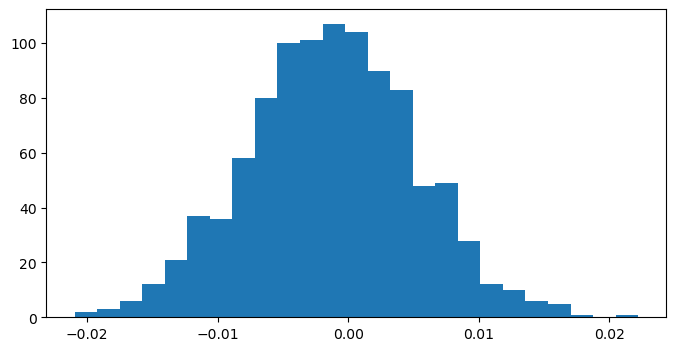

In [33]:
plt.figure(figsize=(8,4))
plt.hist(mean_diff,bins =25)
plt.show()

In [34]:
# This shows sample nearly follows normal distribution

In [35]:
# Now to stimulate distribution for null hypothesis
# Null hypothesis : = The difference in means of conversions between the control and treatment group is minimal.

In [36]:
means_diff =  np.array(mean_diff)
null_values = np.random.normal(0,means_diff.std(), means_diff.size)

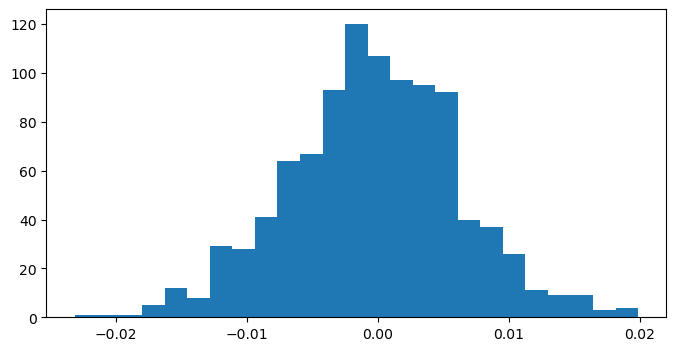

In [37]:
# Plot the null distribution
plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_values, bins = 25)
plt.show()

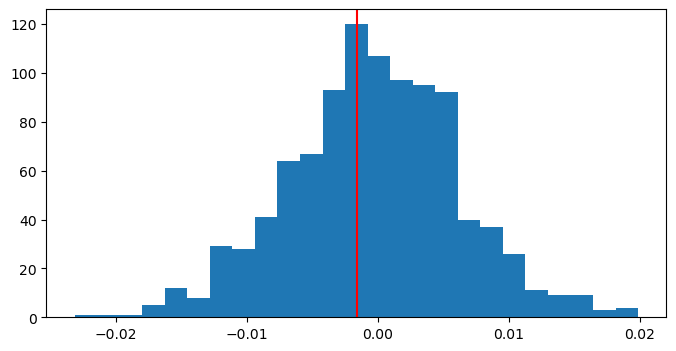

In [38]:
# Plot observed statistic with the null distibution
control_mean = df_2[df_2["group"] == "control"]["converted"].mean()
treat_mean = df_2[df_2["group"] == "treatment"]["converted"].mean()
obs_diff = treat_mean - control_mean

plt.figure(figsize = (8,4), dpi = 100)
plt.hist(null_values, bins = 25)
plt.axvline(obs_diff, c='red')
plt.show()

In [39]:
# calculating the p value 
(null_values > obs_diff).mean()

0.589

Since your p-value (0.589) is above the typical alpha thresholds like 0.05 or 0.01, we do not have enough evidence to reject the null hypothesis.

So no evidence for the impact of new page 

-----------------

Build in function for test

In [41]:
import scipy.stats as st 

In [43]:
# Calculate the mean conversion rate for control and treatment groups
control_mean = df_2[df_2['group'] == 'control']['converted'].mean()
treatment_mean = df_2[df_2['group'] == 'treatment']['converted'].mean()

# Calculate the standard deviation for control and treatment groups
control_std = df_2[df_2['group'] == 'control']['converted'].std()
treatment_std = df_2[df_2['group'] == 'treatment']['converted'].std()

# Calculate the sample sizes for control and treatment groups
control_n = df_2[df_2['group'] == 'control']['converted'].count()
treatment_n = df_2[df_2['group'] == 'treatment']['converted'].count()

# Perform two-sample t-test
t_stat, p_val = st.ttest_ind(df_2[df_2['group'] == 'control']['converted'],
                                df_2[df_2['group'] == 'treatment']['converted'],
                                equal_var=False)  # Welch's t-test for unequal variances

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 1.311605949958001, P-value: 0.18965416073470676
